In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

In [2]:
#importing the data file and displaying the data types
df_mar = pd.read_csv('D2_mar.csv')

df_mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
residual_transmission                 102 non-null float64
regulatable_transmission              102 non-null float64
recovery_rate                         102 non-null float64
detection_rate                        102 non-null float64
death_rate                            102 non-null float64
response_slope                        102 non-null float64
initial_relative_latent_infections    102 non-null float64
response_weights                      102 non-null float64
Country                               102 non-null object
dtypes: float64(8), object(1)
memory usage: 7.2+ KB


In [3]:
#importing the data file and displaying the data types
df_apr = pd.read_csv('C:\\Users\\Owner\\Downloads\\Assessment 2 datasets\\D2_apr.csv')

df_apr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
residual_transmission                 118 non-null float64
regulatable_transmission              118 non-null float64
recovery_rate                         118 non-null float64
detection_rate                        118 non-null float64
death_rate                            118 non-null float64
response_slope                        118 non-null float64
initial_relative_latent_infections    118 non-null float64
response_weights                      118 non-null float64
Country                               118 non-null object
dtypes: float64(8), object(1)
memory usage: 8.4+ KB


In [4]:
df_mar.describe()

,residual_transmission,regulatable_transmission,recovery_rate,detection_rate,death_rate,response_slope,initial_relative_latent_infections,response_weights
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.197575,0.189662,0.153142,0.255073,0.169050,0.327380,0.249317,0.060356
std,0.162790,0.141508,0.171544,0.140229,0.125827,0.094850,0.131924,0.107942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.109152,0.114929,0.043039,0.185192,0.090103,0.285337,0.175473,0.030672
50%,0.154607,0.147812,0.090012,0.234313,0.136567,0.327628,0.219543,0.043006
75%,0.207843,0.211925,0.184495,0.291991,0.210426,0.365861,0.298990,0.060159
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df_apr.describe()

,residual_transmission,regulatable_transmission,recovery_rate,detection_rate,death_rate,response_slope,initial_relative_latent_infections,response_weights
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,0.264999,0.212013,0.233539,0.372084,0.215837,0.548253,0.308286,0.162710
std,0.149130,0.118902,0.224038,0.185763,0.168561,0.125433,0.173088,0.179669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173059,0.151003,0.067059,0.248497,0.101982,0.510047,0.206353,0.086540
50%,0.258072,0.192661,0.148754,0.343710,0.171844,0.572325,0.268422,0.122920
75%,0.334805,0.241032,0.327349,0.421719,0.297507,0.622656,0.361678,0.156091
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df_mar[['Country']] = df_mar[['Country']].astype('category')
df_apr[['Country']] = df_apr[['Country']].astype('category')

In [7]:
#drop unecessary varibales
df_mar = df_mar.drop(['response_slope', 'initial_relative_latent_infections', 'response_weights'], axis=1)
df_mar.info()

print()

#drop unecessary varibales
df_apr = df_apr.drop(['response_slope', 'initial_relative_latent_infections', 'response_weights'], axis=1)
df_apr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
residual_transmission       102 non-null float64
regulatable_transmission    102 non-null float64
recovery_rate               102 non-null float64
detection_rate              102 non-null float64
death_rate                  102 non-null float64
Country                     102 non-null category
dtypes: category(1), float64(5)
memory usage: 10.0 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
residual_transmission       118 non-null float64
regulatable_transmission    118 non-null float64
recovery_rate               118 non-null float64
detection_rate              118 non-null float64
death_rate                  118 non-null float64
Country                     118 non-null category
dtypes: category(1), float64(5)
memory usage: 10.7 KB


In [8]:
# start of clustering for March
from sklearn.preprocessing import StandardScaler

# take important variables and drop the rest
df2_mar = df_mar[['regulatable_transmission', 'residual_transmission', 'recovery_rate', 'death_rate', 'detection_rate']]

# convert df2 to matrix
X = df2_mar.to_numpy()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
from sklearn.cluster import KMeans

# random state
rs =42

# set the random state.s different random state seeds might result in different centroids locations
model = KMeans(n_clusters=4, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 215.3762918742934
Centroid locations:
[-0.27977778 -0.27456165 -0.34557546 -0.22650755 -0.01003089]
[ 1.97952173  2.84296209  0.64525345  1.73840057 -1.39443246]
[-0.29918907 -0.25164252  1.81779438  0.45369183  0.47108239]
[ 3.92880316 -0.42682935  0.92150869 -1.25780548  4.08522834]


Cluster membership
0    80
2    11
1     9
3     2
Name: Cluster_ID, dtype: int64


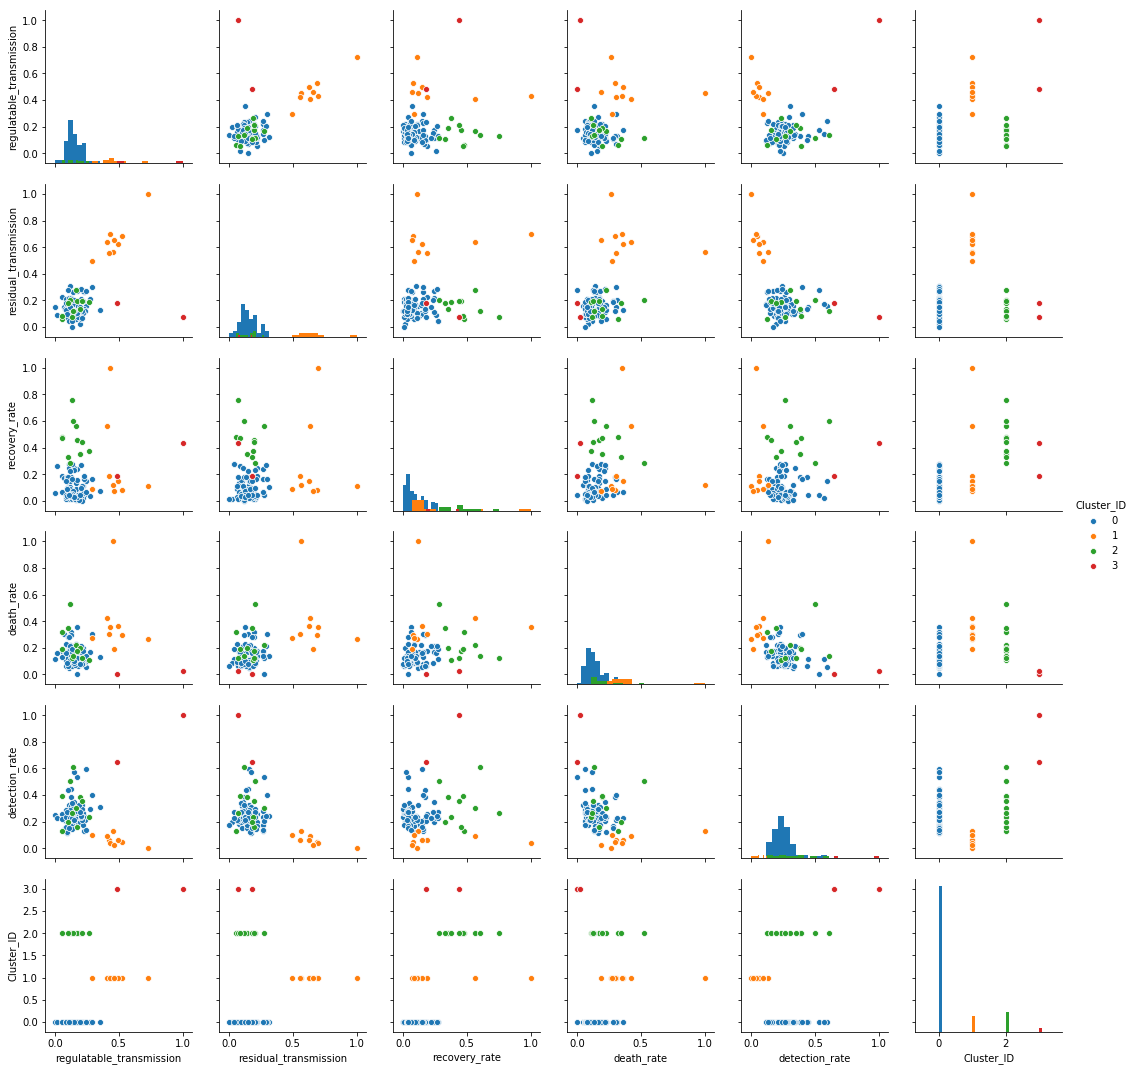

In [10]:
model = KMeans(n_clusters=4, random_state=rs).fit(X)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X)
df2_mar['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df2_mar['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2_mar, hue='Cluster_ID',diag_kind='hist')
plt.show()

Distribution for cluster 0
Distribution for cluster 1
Distribution for cluster 2
Distribution for cluster 3


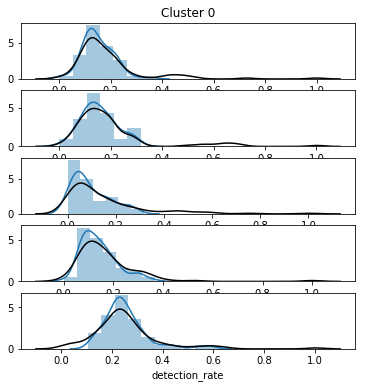

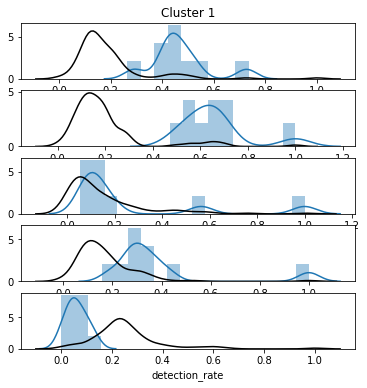

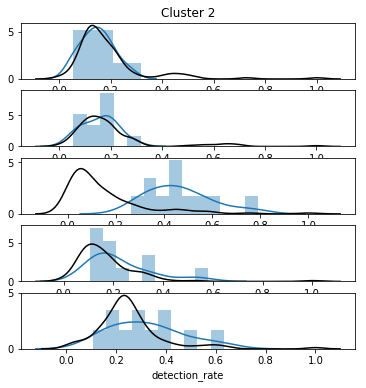

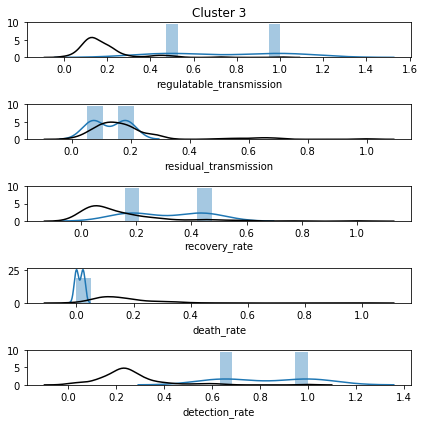

In [11]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['regulatable_transmission', 'residual_transmission', 'recovery_rate', 'death_rate', 'detection_rate']
n_bins = 20

# inspecting cluster 0 and 1
clusters_to_inspect = [0, 1, 2, 3]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=5, figsize=(6,6))
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2_mar[col]), max(df2_mar[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df2_mar[df2_mar['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2_mar[col], bins=bins, ax=ax[j], hist=False, color="k", )

plt.tight_layout()
plt.show()

In [12]:
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(1, 13, 1):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs)
    model.fit(X)

    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

N:\Programs\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


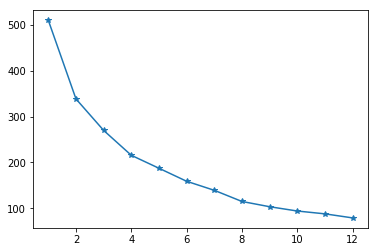

In [13]:
# plot the inertia vs K values
plt.plot(range(1,13,1), inertia_vals, marker='*')
plt.show()

In [14]:
# silhouette score calulation
from sklearn.metrics import silhouette_score

print(clusters[1])
print("Silhouette score for k=2", silhouette_score(X, clusters[1].predict(X)))

print(clusters[2])
print("Silhouette score for k=3", silhouette_score(X, clusters[2].predict(X)))

print(clusters[3])
print("Silhouette score for k=4", silhouette_score(X, clusters[3].predict(X)))

print(clusters[4])
print("Silhouette score for k=5", silhouette_score(X, clusters[4].predict(X)))

print(clusters[5])
print("Silhouette score for k=6", silhouette_score(X, clusters[5].predict(X)))

print(clusters[6])
print("Silhouette score for k=7", silhouette_score(X, clusters[6].predict(X)))

print(clusters[7])
print("Silhouette score for k=8", silhouette_score(X, clusters[7].predict(X)))

print(clusters[8])
print("Silhouette score for k=9", silhouette_score(X, clusters[8].predict(X)))

print(clusters[9])
print("Silhouette score for k=10", silhouette_score(X, clusters[9].predict(X)))

KMeans(n_clusters=2, random_state=42)
Silhouette score for k=2 0.5995519273120258
KMeans(n_clusters=3, random_state=42)
Silhouette score for k=3 0.4213881377021544
KMeans(n_clusters=4, random_state=42)
Silhouette score for k=4 0.426365144292682
KMeans(n_clusters=5, random_state=42)
Silhouette score for k=5 0.3430234232572776
KMeans(n_clusters=6, random_state=42)
Silhouette score for k=6 0.34018257508540317
KMeans(n_clusters=7, random_state=42)
Silhouette score for k=7 0.23111495979800198
KMeans(random_state=42)
Silhouette score for k=8 0.2995152584321365
KMeans(n_clusters=9, random_state=42)
Silhouette score for k=9 0.2535801750322399
KMeans(n_clusters=10, random_state=42)
Silhouette score for k=10 0.22939980679598193


In [15]:
# start of clustering for April
from sklearn.preprocessing import StandardScaler

# take 3 variables and drop the rest
df2_apr = df_apr[['regulatable_transmission', 'residual_transmission', 'recovery_rate', 'death_rate', 'detection_rate']]

# convert df2 to matrix
X = df2_apr.to_numpy()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
from sklearn.cluster import KMeans

# random state
rs = 42

# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=3, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 354.53976382312726
Centroid locations:
[-0.22773638 -0.24303625 -0.23771043  0.0727302  -0.30678235]
[ 0.92467666  0.44153191  0.68593477 -0.8599104   1.73275512]
[ 0.72842151  3.50369238  2.15652135  2.5903922  -1.45439047]


Cluster membership
0    94
1    20
2     4
Name: Cluster_ID, dtype: int64


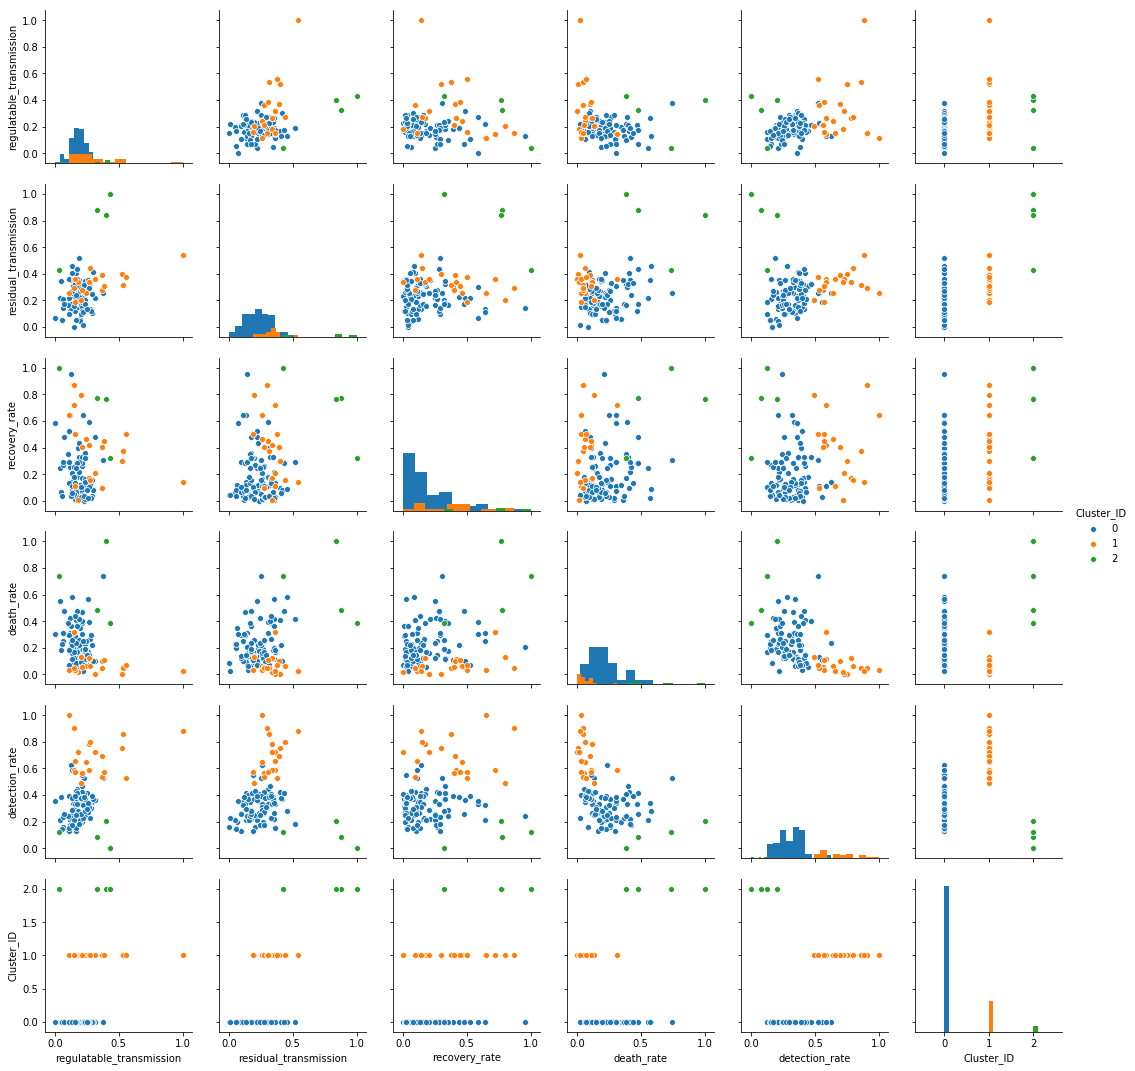

In [17]:
model = KMeans(n_clusters=3, random_state=rs).fit(X)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X)
df2_apr['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df2_apr['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2_apr, hue='Cluster_ID',diag_kind='hist')
plt.show()

Distribution for cluster 0
Distribution for cluster 1
Distribution for cluster 2


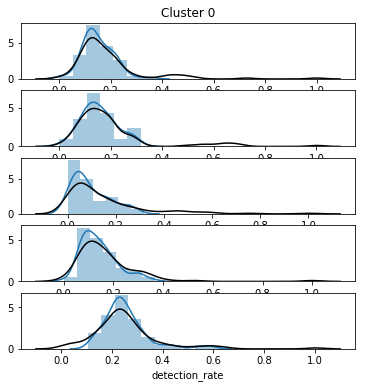

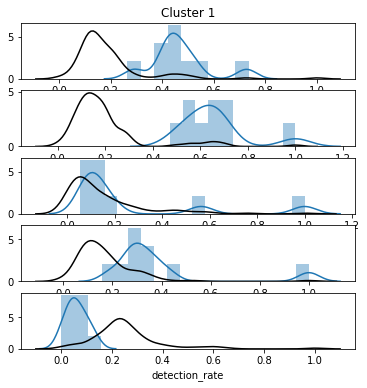

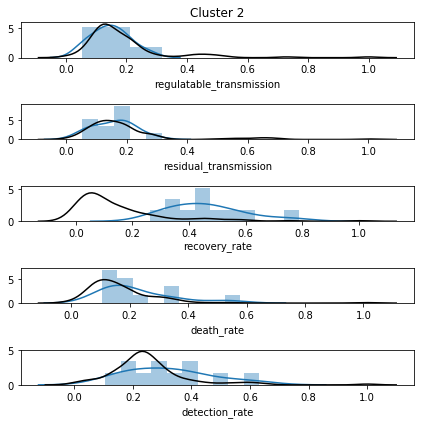

In [18]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['regulatable_transmission', 'residual_transmission', 'recovery_rate', 'death_rate', 'detection_rate']
n_bins = 20

# inspecting cluster 0 and 1
clusters_to_inspect = [0, 1, 2]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=5, figsize=(6,6))
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2_mar[col]), max(df2_mar[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df2_mar[df2_mar['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2_mar[col], bins=bins, ax=ax[j], hist=False, color="k", )

plt.tight_layout()
plt.show()

In [19]:
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(1, 13, 1):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs)
    model.fit(X)

    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

N:\Programs\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


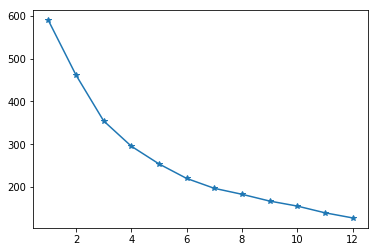

In [20]:
# plot the inertia vs K values
plt.plot(range(1,13,1), inertia_vals, marker='*')
plt.show()

In [21]:
# silhouette score calulation
from sklearn.metrics import silhouette_score

print(clusters[1])
print("Silhouette score for k=2", silhouette_score(X, clusters[1].predict(X)))

print(clusters[2])
print("Silhouette score for k=3", silhouette_score(X, clusters[2].predict(X)))

print(clusters[3])
print("Silhouette score for k=4", silhouette_score(X, clusters[3].predict(X)))

print(clusters[4])
print("Silhouette score for k=5", silhouette_score(X, clusters[4].predict(X)))

print(clusters[5])
print("Silhouette score for k=6", silhouette_score(X, clusters[5].predict(X)))

print(clusters[6])
print("Silhouette score for k=7", silhouette_score(X, clusters[6].predict(X)))

print(clusters[7])
print("Silhouette score for k=8", silhouette_score(X, clusters[7].predict(X)))

KMeans(n_clusters=2, random_state=42)
Silhouette score for k=2 0.3729216943899199
KMeans(n_clusters=3, random_state=42)
Silhouette score for k=3 0.3876459627218534
KMeans(n_clusters=4, random_state=42)
Silhouette score for k=4 0.302752506670709
KMeans(n_clusters=5, random_state=42)
Silhouette score for k=5 0.2649812399212552
KMeans(n_clusters=6, random_state=42)
Silhouette score for k=6 0.27760835141501256
KMeans(n_clusters=7, random_state=42)
Silhouette score for k=7 0.21346698378932286
KMeans(random_state=42)
Silhouette score for k=8 0.19907725008910052


In [22]:
# Fix me please
df_mar_cl1 = df2_mar[(df2_mar['Cluster_ID'] == 1)]
leftjoin1=pd.merge(df_mar_cl1,df_mar,how='left')
print(leftjoin1['Country'])

0    HND
1    KHM
2    MUS
3    NGA
4    PSE
5    AFG
6    VEN
7    CMR
8    CUB
Name: Country, dtype: category
Categories (102, object): [AFG, ALB, AND, ARE, ..., UZB, VEN, VNM, ZAF]


In [23]:
df_apr_cl1 = df2_apr[(df2_apr['Cluster_ID'] == 1)]
leftjoin2=pd.merge(df_apr_cl1,df_apr,how='left')
leftjoin2

,regulatable_transmission,residual_transmission,recovery_rate,death_rate,detection_rate,Cluster_ID,Country
0,0.146323,0.358552,0.717806,0.317014,0.587117,1,IRN
1,0.268372,0.340873,0.418398,0.113777,0.587414,1,ISL
2,0.241434,0.257945,0.465664,0.062060,0.645943,1,JOR
3,0.265419,0.334592,0.170568,0.120128,0.783311,1,KEN
4,0.114393,0.258239,0.648025,0.030032,1.000000,1,KHM
5,0.523623,0.397440,0.301241,0.005716,0.751463,1,KOR
6,0.318098,0.357863,0.205188,0.000000,0.725182,1,AUS
7,0.182355,0.335921,0.002533,0.015969,0.720931,1,MNE
8,0.537029,0.312709,0.375131,0.045184,0.861625,1,AUT
9,0.372071,0.392801,0.405543,0.104703,0.695826,1,NZL


In [24]:
leftjoin3=pd.merge(df2_apr,df_apr,how='left')
leftjoin4=pd.merge(df2_mar,df_mar,how='left')
leftjoin5=pd.merge(leftjoin4,leftjoin3,how='left',on='Country')
print(leftjoin5[['Cluster_ID_x','Cluster_ID_y','Country']])

     Cluster_ID_x  Cluster_ID_y Country
0               0             0     ARM
1               1             0     HND
2               0             0     HRV
3               0             0     HUN
4               0             0     IDN
5               0             0     IND
6               0             0     IRL
7               2             1     IRN
8               2             0     IRQ
9               0             1     ISL
10              0             0     ISR
11              0             0     ITA
12              0             1     JOR
13              0             0     JPN
14              2             0     KAZ
15              1             1     KHM
16              3             1     KOR
17              0             0     KWT
18              0             0     LBN
19              0             0     LKA
20              0             0     LTU
21              0             0     LUX
22              0             0     LVA
23              0             0     MAR


In [28]:
change=leftjoin5[['Cluster_ID_x','Cluster_ID_y','Country']]
change = change[['Cluster_ID_x', 'Cluster_ID_y','Country']].assign(Change=change.Cluster_ID_x != change.Cluster_ID_y)
true_change = change[(change['Change'] == True)]
true_change

,Cluster_ID_x,Cluster_ID_y,Country,Change
1,1,0,HND,True
7,2,1,IRN,True
8,2,0,IRQ,True
9,0,1,ISL,True
12,0,1,JOR,True
14,2,0,KAZ,True
16,3,1,KOR,True
28,0,1,AUS,True
29,1,0,MUS,True
31,0,1,AUT,True
